# 孤立森林

### data1数据

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

### 读取文件

In [33]:
dataset = pd.read_csv('data/data1.csv',engine='python')

In [34]:
dataset

,35KV 1# 主变用电量,data
0,90476192,NaN
1,1372980,-89103212.0
2,90476400,89103420.0
3,1372980,-89103420.0
4,90476616,89103636.0
...,...,...
145,1373260,-89118364.0
146,90491832,89118572.0
147,1373260,-89118572.0
148,90492048,89118788.0


### 数据清洗

In [35]:
dataset = dataset.fillna(0)
dataset

,35KV 1# 主变用电量,data
0,90476192,0.0
1,1372980,-89103212.0
2,90476400,89103420.0
3,1372980,-89103420.0
4,90476616,89103636.0
...,...,...
145,1373260,-89118364.0
146,90491832,89118572.0
147,1373260,-89118572.0
148,90492048,89118788.0


### 绘制初始数据

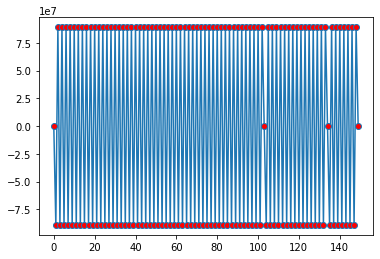

In [36]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

### 设置变量值

In [37]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.015
test_data = []
anomaly = []

In [38]:
dataset.shape

(150, 2)

In [39]:
dataset["data"]

0             0.0
1     -89103212.0
2      89103420.0
3     -89103420.0
4      89103636.0
          ...    
145   -89118364.0
146    89118572.0
147   -89118572.0
148    89118788.0
149          96.0
Name: data, Length: 150, dtype: float64

### 数据归一化

In [40]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [41]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [42]:
x

array([[-1.21186714e-06],
       [-9.99827646e-01],
       [ 9.99827556e-01],
       [-9.99829980e-01],
       [ 9.99829980e-01],
       [-9.99832403e-01],
       [ 9.99832224e-01],
       [-9.99834647e-01],
       [ 9.99834647e-01],
       [-9.99837071e-01],
       [ 9.99836981e-01],
       [-9.99839405e-01],
       [ 9.99839405e-01],
       [-9.99841829e-01],
       [ 9.99841649e-01],
       [-9.99844073e-01],
       [ 9.99844073e-01],
       [-9.99846497e-01],
       [ 9.99846407e-01],
       [-9.99848831e-01],
       [ 9.99848831e-01],
       [-9.99851255e-01],
       [ 9.99851075e-01],
       [-9.99853499e-01],
       [ 9.99852242e-01],
       [-9.99854666e-01],
       [ 9.99854666e-01],
       [-9.99857089e-01],
       [ 9.99857000e-01],
       [-9.99859423e-01],
       [ 9.99859423e-01],
       [-9.99861847e-01],
       [ 9.99861668e-01],
       [-9.99864091e-01],
       [ 9.99864091e-01],
       [-9.99866515e-01],
       [ 9.99866425e-01],
       [-9.99868849e-01],
       [ 9.9

### 引入IsolationForest

In [43]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [44]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 8 of 50 for this paral

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7F96A66A9340, verbose=2)

### 预测结果

In [45]:
scores_pred = ifm.decision_function(x)

In [46]:
scores_pred

array([-2.64774717e-01, -1.11778000e-01, -1.02661283e-01, -6.54343038e-02,
       -6.91783710e-02, -5.03735660e-02, -4.78146005e-02, -4.30344279e-02,
       -4.11117901e-02, -3.48668310e-02, -3.36547129e-02, -3.02694411e-02,
       -2.34708641e-02, -1.01619248e-02, -2.05699929e-02, -6.55417063e-03,
       -1.53156547e-02, -7.18818036e-04, -1.13168814e-03,  1.22550013e-04,
        3.28843833e-03,  5.40744220e-03,  1.03357160e-02,  2.06573107e-02,
        1.42052735e-02,  1.97837020e-02,  1.54818697e-03,  1.63434976e-02,
        7.71857275e-03,  1.36376542e-02,  7.68524783e-03,  7.70156767e-03,
        1.38469632e-02,  1.80071173e-02,  1.41935852e-02,  1.44626016e-02,
        1.23101061e-02,  1.61479663e-02,  1.62029808e-02,  1.86040596e-02,
        1.27960798e-02,  1.26374847e-02,  1.06986764e-02,  1.98567723e-02,
        2.02030898e-02,  1.77819032e-02,  2.10904615e-02,  1.24726060e-02,
        1.55513465e-02,  2.58579748e-03,  1.80313126e-02,  5.46166406e-03,
        1.41755882e-02,  

In [47]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [48]:
threshold

-0.1918255304044141

In [49]:
dataset

,35KV 1# 主变用电量,data
0,90476192,0.0
1,1372980,-89103212.0
2,90476400,89103420.0
3,1372980,-89103420.0
4,90476616,89103636.0
...,...,...
145,1373260,-89118364.0
146,90491832,89118572.0
147,1373260,-89118572.0
148,90492048,89118788.0


### 绘制预测效果

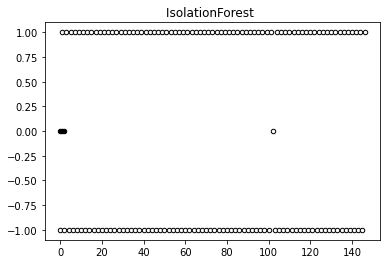

In [50]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['35KV 1# 主变用电量'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['35KV 1# 主变用电量','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,147)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,3)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [51]:
len(test_data)

150

In [52]:
ano_lable = np.column_stack(((df['35KV 1# 主变用电量'],df['data'],x,scores_pred, test_data)))

In [53]:
ano_lable

array([[ 9.04761920e+07,  0.00000000e+00, -1.21186714e-06,
        -2.64774717e-01,  1.00000000e+00],
       [ 1.37298000e+06, -8.91032120e+07, -9.99827646e-01,
        -1.11778000e-01,  0.00000000e+00],
       [ 9.04764000e+07,  8.91034200e+07,  9.99827556e-01,
        -1.02661283e-01,  0.00000000e+00],
       [ 1.37298000e+06, -8.91034200e+07, -9.99829980e-01,
        -6.54343038e-02,  0.00000000e+00],
       [ 9.04766160e+07,  8.91036360e+07,  9.99829980e-01,
        -6.91783710e-02,  0.00000000e+00],
       [ 1.37298000e+06, -8.91036360e+07, -9.99832403e-01,
        -5.03735660e-02,  0.00000000e+00],
       [ 9.04768160e+07,  8.91038360e+07,  9.99832224e-01,
        -4.78146005e-02,  0.00000000e+00],
       [ 1.37298000e+06, -8.91038360e+07, -9.99834647e-01,
        -4.30344279e-02,  0.00000000e+00],
       [ 9.04770320e+07,  8.91040520e+07,  9.99834647e-01,
        -4.11117901e-02,  0.00000000e+00],
       [ 1.37298000e+06, -8.91040520e+07, -9.99837071e-01,
        -3.48668310e-02

In [54]:
df = pd.DataFrame(data=ano_lable, columns=['35KV 1# 主变用电量','data','x', 'IsoFst_Score','label'])

In [55]:
df

,35KV 1# 主变用电量,data,x,IsoFst_Score,label
0,90476192.0,0.0,-1.211867e-06,-0.264775,1.0
1,1372980.0,-89103212.0,-9.998276e-01,-0.111778,0.0
2,90476400.0,89103420.0,9.998276e-01,-0.102661,0.0
3,1372980.0,-89103420.0,-9.998300e-01,-0.065434,0.0
4,90476616.0,89103636.0,9.998300e-01,-0.069178,0.0
...,...,...,...,...,...
145,1373260.0,-89118364.0,-9.999977e-01,-0.069060,0.0
146,90491832.0,89118572.0,9.999976e-01,-0.088434,0.0
147,1373260.0,-89118572.0,-1.000000e+00,-0.112548,0.0
148,90492048.0,89118788.0,1.000000e+00,-0.130869,0.0


In [56]:
df['x'][df['label'] == 1]

0     -1.211867e-06
134    1.211867e-06
149   -1.346519e-07
Name: x, dtype: float64

### 绘制孤立点

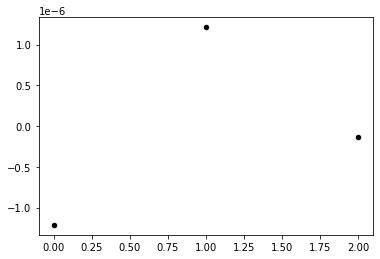

In [57]:
c = plt.scatter(list(range(0,3)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

### 最终结果

In [58]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.1918255304044141
全量数据样本数： 150 个
检测异常样本数： 3 个
